# Занятие по телемедицине, 12 октября 2016.

Эта страница — интерактивный документ. Её можно читать, дописывать, и прямо тут отдавать команды на вычисления и отображать их результаты. 

Сегодня мы продолжим привыкать к языку Python и познакомимся с визуалиацией и выделением признаков из сигнала. Для этого нам понадобятся данные в том виде, в котором их можно считать с какого-нибудь датчика: как последовательность значений. Затем нужно представить их в удобной для обработки форме, и понять, в чем, собственно, заключается обработка. 

## Считывание данных

In [8]:
%pwd

'/Users/presscenter/Desktop'

In [2]:
import math
import numpy as np
#import pyaudio
import scipy.io.wavfile as wavfile
rate, data = wavfile.read('whistle.wav')
time = np.arange(len(data[:,0]))*1.0/rate

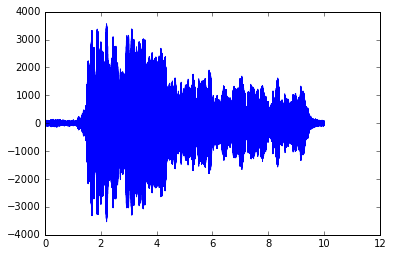

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(time, data[:,0])
plt.show()

В файле записан стерео-звук, но между каналами нет существенной разницы. Вот два способа из массива формы 2-на-много вытащить один массив:

In [16]:
def first(t):
    return t[0]

In [22]:
left_channel= list(map(first, data))

Давайте найдем что-нибудь простое в этом сигнале. Например, локальный максимум громкости.

In [35]:
max_val = max(left_channel)

In [36]:
max_idx = left_channel.index(max_val)

In [37]:
max_idx

97085

In [39]:
max_idx_time_coord = max_idx*1.0/rate

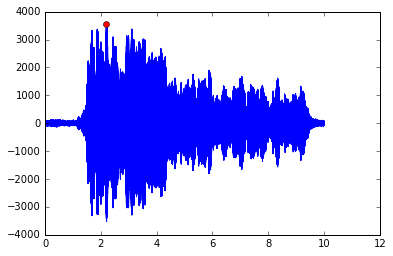

In [40]:
%matplotlib inline
plt.plot(time, data[:,0])
plt.plot(max_idx_time_coord, max_val, 'ro')
plt.show()